In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [75]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier , plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [76]:
df = pd.read_csv('/content/salaries.csv')
print(df.head())

  company                  job     degree  salary_more_then_100k
0  google      sales executive  bachelors                      0
1  google      sales executive    masters                      0
2  google     business manager  bachelors                      1
3  google     business manager    masters                      1
4  google  computer programmer  bachelors                      0


In [77]:
label_encoders = {}
for column in ['company', 'job', 'degree']:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

df.head()

,company,job,degree,salary_more_then_100k
0,2,2,0,0
1,2,2,1,0
2,2,0,0,1
3,2,0,1,1
4,2,1,0,0


In [72]:
df

,company,job,degree,salary_more_then_100k
0,2,2,0,0
1,2,2,1,0
2,2,0,0,1
3,2,0,1,1
4,2,1,0,0
5,2,1,1,1
6,0,2,1,0
7,0,1,0,0
8,0,0,0,0
9,0,0,1,1


In [78]:
x = df[['company', 'job', 'degree']]
y = df['salary_more_then_100k']
x_train, x_test, y_train, y_test  = train_test_split(x,y, test_size = 0.2, random_state=42)

In [79]:
clf = DecisionTreeClassifier(criterion = 'gini', class_weight = 'balanced', random_state = 42)
clf.fit(x_train, y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=42)

In [82]:
y_pred = clf.predict(x_test)
print('Accuracy score :', accuracy_score(y_test, y_pred))
print('Classification report : ', classification_report(y_test, y_pred))
print('Confusion matrix : \n',confusion_matrix(y_test, y_pred))


Accuracy score : 0.75
Classification report :                precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       1.00      0.50      0.67         2

    accuracy                           0.75         4
   macro avg       0.83      0.75      0.73         4
weighted avg       0.83      0.75      0.73         4

Confusion matrix : 
 [[2 0]
 [1 1]]


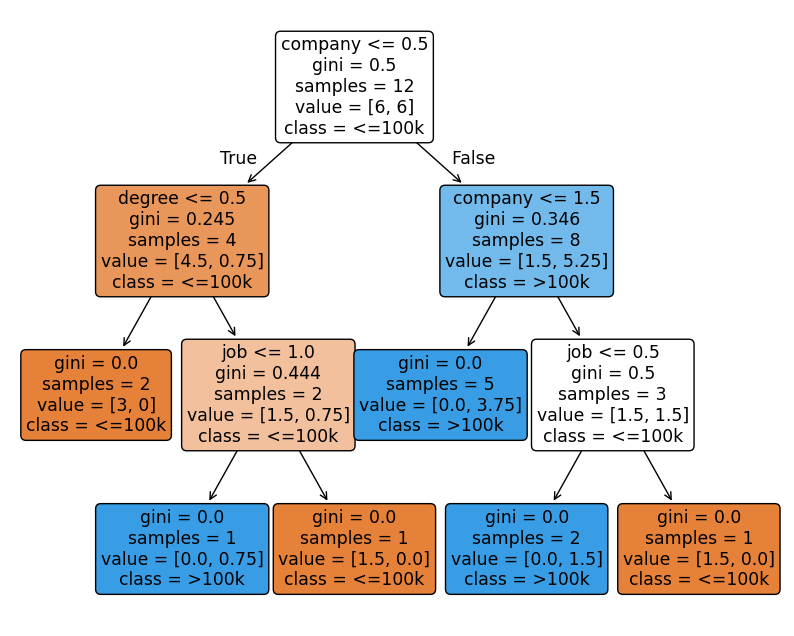

In [83]:
plt.figure(figsize=(10,8))
plot_tree(clf,feature_names=['company','job','degree'],class_names = ['<=100k', '>100k'], filled = True, rounded = True)
plt.show()

In [84]:
clf_tuned = DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=3, min_samples_leaf=2,class_weight = 'balanced', random_state=42)
clf_tuned.fit(x_train, y_train)
y_pred_tuned = clf_tuned.predict(x_test)
print("Tuned Accuracy:", accuracy_score(y_test, y_pred_tuned))

Tuned Accuracy: 0.75


In [85]:
new_data = pd.DataFrame({'company': [0], 'job': [1], 'degree': [1]})
predicted_salary = clf_tuned.predict(new_data)
print("Predicted Salary Category:", predicted_salary[0])

Predicted Salary Category: 0
